<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI_0427_no0_stop_15inter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tigramite
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.3/311.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [ ]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [ ]:
df = pd.read_csv(r"/content/0427_delaymean_None_300600_15.csv", index_col=0)
# df = pd.read_csv(r"/content/0427_delaymean_none_300600.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

,Arlanda central,Barkarby,Bro,Bålsta,Farsta strand,Flemingsberg,Gnesta,Gröndalsviken,Handen,Helenelund,...,Tungelsta,Ulriksdal,Upplands Väsby,Uppsala C,Vega,Västerhaninge,Älvsjö,Årstaberg,Ösmo,Östertälje
300.0,0.0,-52.0,0.0,0.0,-62.0,-32.000000,0.0,-29.0,-53.0,106.000000,...,0.0,-85.000000,-41.000000,-62.0,-62.0,24.0,-82.000000,-61.000000,-12.0,0.0
315.0,-28.0,0.0,-30.0,0.0,-48.0,-32.000000,6.0,0.0,-21.0,22.000000,...,-21.0,-7.000000,97.000000,0.0,-23.0,25.0,-58.500000,-55.000000,0.0,6.0
330.0,0.0,-60.0,0.0,-50.0,-45.0,-45.000000,0.0,-8.0,-67.0,-32.000000,...,0.0,-65.000000,-15.000000,-45.0,-69.0,-25.0,-88.500000,-44.000000,30.0,2.5
345.0,366.0,0.0,-48.0,0.0,-76.0,39.000000,0.0,0.0,-50.0,142.000000,...,9.0,110.000000,-40.000000,0.0,-54.0,14.0,-16.333333,-19.000000,0.0,-26.0
360.0,0.0,62.0,0.0,-86.0,-94.0,-32.500000,0.0,-20.0,-58.0,-40.000000,...,0.0,-83.000000,76.000000,235.0,-85.0,42.0,25.666667,-53.500000,0.0,-10.0
375.0,460.0,-36.0,0.0,0.0,-82.0,-52.000000,129.0,0.0,-49.0,-32.000000,...,-38.0,-90.000000,-56.000000,0.0,-53.0,12.0,-38.250000,245.400000,0.0,45.0
390.0,0.0,-42.0,0.0,-15.0,-64.0,-38.500000,0.0,-24.0,38.0,307.666667,...,0.0,297.666667,-49.000000,351.0,0.0,-8.0,-87.666667,-52.666667,-24.0,333.0
405.0,11.0,-34.0,-18.0,0.0,-28.5,417.000000,0.0,0.0,-17.0,-30.500000,...,-24.0,-60.500000,143.333333,0.0,-12.0,35.0,-59.333333,-44.666667,0.0,206.5
420.0,0.0,-47.0,0.0,-25.0,-88.5,-49.000000,0.0,-17.0,-58.5,-39.500000,...,0.0,-74.500000,-46.000000,-4.0,-61.0,10.5,58.666667,103.666667,-32.0,27.5
435.0,-50.0,-50.5,-45.0,0.0,-93.0,177.333333,-46.0,0.0,-15.0,275.500000,...,-20.0,271.500000,51.666667,0.0,-19.0,36.0,91.250000,112.333333,0.0,-35.5


In [ ]:
# df_delay = df.drop(columns=["Departure_Time"])
# df_delay = df_delay.where(df_delay >= 180, 0)
df_delay=df
df_delay.columns

Index(['Arlanda central', 'Barkarby', 'Bro', 'Bålsta', 'Farsta strand',
       'Flemingsberg', 'Gnesta', 'Gröndalsviken', 'Handen', 'Helenelund',
       'Hemfosa', 'Huddinge', 'Häggvik', 'Jakobsberg', 'Jordbro', 'Järna',
       'Kallhäll', 'Knivsta', 'Krigslida', 'Kungsängen', 'Märsta', 'Mölnbo',
       'Norrviken', 'Nynäsgård', 'Nynäshamn', 'Rosersberg', 'Rotebro',
       'Rönninge', 'Segersäng', 'Skogås', 'Sollentuna', 'Solna', 'Spånga',
       'Stockholm City', 'Stockholm Odenplan', 'Stockholms södra', 'Stuvsta',
       'Sundbyberg', 'Södertälje centrum', 'Södertälje hamn', 'Södertälje syd',
       'Trångsund', 'Tullinge', 'Tumba', 'Tungelsta', 'Ulriksdal',
       'Upplands Väsby', 'Uppsala C', 'Vega', 'Västerhaninge', 'Älvsjö',
       'Årstaberg', 'Ösmo', 'Östertälje'],
      dtype='object')

# PCMCI 用车站作为列，车次作为行 分析

分析车站之间的因果关系

In [ ]:
dataframe = pp.DataFrame(data = df_delay.values, var_names = df_delay.columns)

/usr/local/lib/python3.12/dist-packages/tigramite/data_processing.py:308: UserWarning: In analysis mode 'single', 'data'.shape = (21, 54); is it of shape (observations, variables)?
  warnings.warn("In analysis mode 'single', 'data'.shape = ({}, {});"\


In [ ]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

# 早高峰
# 筛选前后
cond_ind_test=gpdc #非线性关系
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 3 #评价影响几个车次，1-10个数多少
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05,max_conds_dim=None)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels


## Resulting lagged parent (super)sets:

    Variable Arlanda central has 4 link(s):
    [pc_alpha = 0.1]
        (Nynäsgård -1): max_pval = 0.02800, |min_val| =  0.629
        (Nynäsgård -3): max_pval = 0.03400, |min_val| =  0.616
        (Uppsala C -3): max_pval = 0.03400, |min_val| =  0.615
        (Nynäshamn -3): max_pval = 0.06400, |min_val| =  0.578

    Variable Barkarby has 5 link(s):
    [pc_alpha = 0.4]
        (Helenelund -1): max_pval = 0.16200, |min_val| =  0.500
        (Skogås -1): max_pval = 0.20000, |min_val| =  0.473
        (Trångsund -2): max_pval = 0.30200, |min_val| =  0.435
        (Jordbro -2): max_pval = 0.31600, |min_val| =  0.430
        (Stockholm Odenplan -3): max_pval = 0.36600, |min_val| =  0.415

    Variable Bro has 5 link(s):
    [pc_alpha = 0.5]
        (Nynäshamn -1): max_pval = 0.30400, |min_val| =  0.434
        (Krigslida -2): max_pval = 0.42000, |min_val| =  0.403
        (Handen -2): max_pval = 0.42800, |min_val| =  0.401
        (Stockholms sö

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.


## Significant links at alpha = 0.05:

    Variable Arlanda central has 29 link(s):
        (Tungelsta  0): pval = 0.00000 | val =  0.852 | unoriented link
        (Tungelsta -2): pval = 0.00000 | val =  0.836
        (Kallhäll -2): pval = 0.00000 | val =  0.791
        (Rönninge -1): pval = 0.00200 | val =  0.731
        (Nynäsgård -1): pval = 0.00800 | val =  0.707
        (Stockholm Odenplan -2): pval = 0.01200 | val =  0.680
        (Nynäshamn -2): pval = 0.01400 | val =  0.673
        (Norrviken  0): pval = 0.01400 | val =  0.672 | unoriented link
        (Nynäsgård -3): pval = 0.01800 | val =  0.669
        (Östertälje -3): pval = 0.02000 | val =  0.667
        (Knivsta  0): pval = 0.02000 | val =  0.665 | unoriented link
        (Bålsta -1): pval = 0.02000 | val =  0.663
        (Stockholm Odenplan -3): pval = 0.02400 | val =  0.645
        (Nynäsgård  0): pval = 0.02400 | val =  0.643 | unoriented link
        (Älvsjö  0): pval = 0.02600 | val =  0.632 | unoriented link
      

p_matrix[i, j, tau]	vs val_matrix[i, j, tau]

统计检验的 p 值（显著性），条件独立性检验的 统计量（强度），❌ 越小越显著，< 0.05 常用于筛选， 用来判断是否显著、有因果边

val_matrix[i, j, tau]，条件独立性检验的 统计量（强度），✅ 越大（或绝对值大）说明依赖更强，用来排序因果边强弱

用法p < 0.05 筛选显著因果边。用 p_matrix 做初步筛选，再用 val_matrix 判断因果强度。

# p_matrix 筛选 并计数不同tau下连接数



In [ ]:
print(results.keys())

p_matrix=results['p_matrix']
print('p_matrix:')
print(p_matrix.shape)
array_1d_p_matrix = p_matrix.reshape(-1)
print(array_1d_p_matrix.shape)
print(len(array_1d_p_matrix[array_1d_p_matrix<=0.05]))
graph=results['graph']
print('graph:')
print(graph.shape)
array_1d_graph = graph.reshape(-1)
print(array_1d_graph.shape)
print(len(array_1d_graph[array_1d_graph!='']))

dict_keys(['graph', 'p_matrix', 'val_matrix', 'conf_matrix'])
p_matrix:
(54, 54, 4)
(11664,)
1121
graph:
(54, 54, 4)
(11664,)
1121


对p_matrix进行筛选

后续站点不会对当前站点造成影响，当前站点的后续车次不会对当前造成影响

p_matrix[i,j,tau]<alpha_level 表示i站点在tau步前对j站点有因果影响

count数不同tau下的因果链接数量

In [ ]:
train_paths = [
    ["Södertälje centrum", "Södertälje hamn", "Östertälje", "Rönninge", "Tumba",
    "Tullinge", "Flemingsberg", "Huddinge", "Stuvsta", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Solna",
    "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken", "Rotebro",
    "Upplands Väsby", "Arlanda central", "Knivsta", "Uppsala C"],
    ["Södertälje centrum", "Södertälje hamn", "Östertälje", "Rönninge", "Tumba",
    "Tullinge", "Flemingsberg", "Huddinge", "Stuvsta", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Solna",
    "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken", "Rotebro",
    "Upplands Väsby", "Rosersberg", "Märsta"],
    ["Nynäshamn", "Gröndalsviken", "Nynäsgård", "Ösmo", "Segersäng", "Hemfosa",
    "Tungelsta", "Krigslida", "Västerhaninge", "Jordbro", "Handen", "Vega",
    "Skogås", "Trångsund", "Farsta strand", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Sundbyberg",
    "Spånga", "Barkarby", "Jakobsberg", "Kallhäll", "Kungsängen", "Bro", "Bålsta"],
    ["Södertälje centrum", "Södertälje hamn", "Södertälje syd", "Järna", "Mölnbo", "Gnesta"],
    ["Nynäshamn", "Gröndalsviken", "Nynäsgård", "Ösmo", "Segersäng", "Hemfosa",
    "Tungelsta", "Krigslida", "Västerhaninge", "Handen", "Farsta strand",
    "Älvsjö", "Årstaberg", "Stockholms södra", "Stockholm City", "Stockholm Odenplan",
    "Solna", "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken",
    "Rotebro", "Upplands Väsby", "Rosersberg", "Märsta"]
]
def is_later_station(train_paths, from_station, to_station):
    for path in train_paths:
        if from_station in path and to_station in path:
            if path.index(to_station) >= path.index(from_station):
                return True
    return False


p_matrix_clean = results['p_matrix'].copy()
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
count = [0] * tau_max_plus1
var_names = df_delay.columns
alpha=0.05
s=0

for lag in range(tau_max_plus1):
    for i in range(num_vars):
        for j in range(num_vars):
            source = var_names[i]
            target = var_names[j]
            # if lag==0:
            #   p_matrix_clean[i,j,lag] = 1

            if not is_later_station(train_paths, source, target):
                p_matrix_clean[i,j,lag] = 1
            elif p_matrix_clean[i,j,lag]<=alpha:
                count[lag] += 1
                if i==j:
                  s+=1

print(count)
print(s)

[101, 114, 62, 85]
19


# 可视化部分

边上的数字是前n个站点的延误对当前站点的因果影响

节点颜色的深浅代表auto-MCI values，表明了过去车次对站点的因果影响

边的颜色深浅代表cross-MCI values，表明了其他站点对该站点的因果影响

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

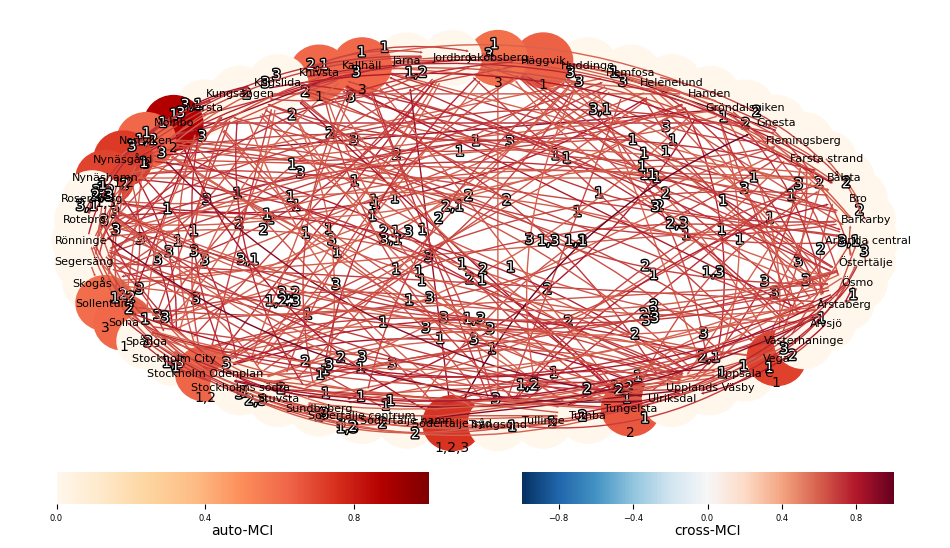

In [ ]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=p_matrix_clean,
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

In [ ]:
target_stations = ['Stockholms södra', 'Stockholm City', 'Stockholm Odenplan', 'Solna']
indices = [df_delay.columns.get_loc(station) for station in target_stations]
print(indices)
print(results['val_matrix'][35,31,:])
print(results['val_matrix'][31,35,:])

[35, 33, 34, 31]
[0.36082813 0.73157796 0.33522958 0.35559213]
[0.36082813 0.33610265 0.37406756 0.45559287]


(<Figure size 600x600 with 1 Axes>, <Axes: >)

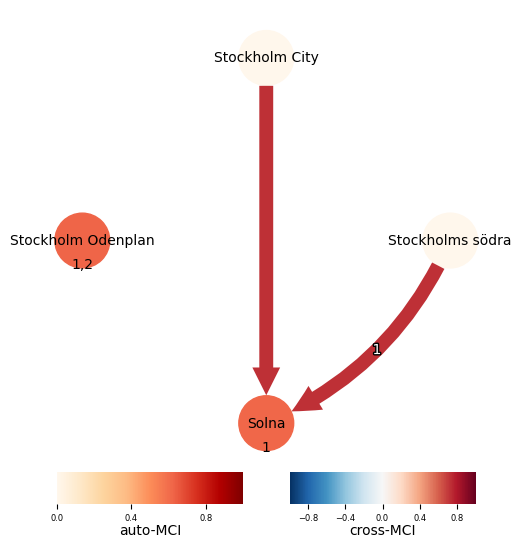

In [ ]:
# 设置显著性水平
alpha_level = 0.05

# 要提取的索引
indices = [35, 33, 34, 31]


p_matrix_3=p_matrix_clean[np.ix_(indices, indices, np.arange(4))]
v3=results['val_matrix'][np.ix_(indices, indices, np.arange(4))]

graph = p_matrix_3 < 0.05

# 绘图
plot_graph(
    graph=graph,
    val_matrix=v3,             # 测试统计值，通常是偏相关或其他统计量
    var_names=target_stations,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(6, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=10.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=10,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

(<Figure size 600x600 with 1 Axes>, <Axes: >)

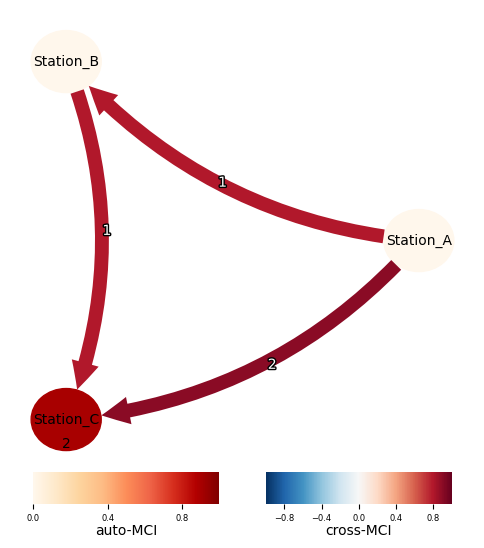

In [ ]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

p_test = np.ones((3, 3, 4))
p_test[0,1,1]=0
p_test[0,2,2]=0
p_test[1,2,1]=0
p_test[2,2,2]=0
bool_mask = p_test == 0
v_test = np.ones((3, 3, 4))
v_test[0,1,1]=0.8
v_test[0,2,2]=0.9
v_test[1,2,1]=0.8
v_test[2,2,2]=0.9


# 绘图
plot_graph(
    graph=bool_mask,
    val_matrix=v_test,             # 测试统计值，通常是偏相关或其他统计量
    var_names=['Station_A','Station_B','Station_C'],                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(6, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=10.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=10,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

# 复杂网络

362


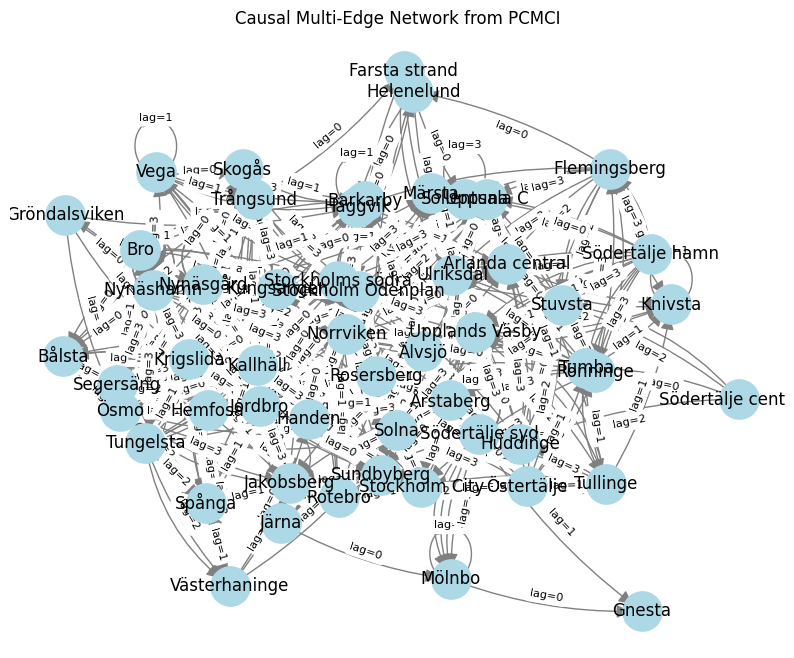

节点个数: 54
节点名称： ['Arlanda central', 'Knivsta', 'Uppsala C', 'Barkarby', 'Bro', 'Kallhäll', 'Kungsängen', 'Bålsta', 'Farsta strand', 'Stockholm Odenplan', 'Ulriksdal', 'Flemingsberg', 'Helenelund', 'Huddinge', 'Häggvik', 'Sollentuna', 'Stuvsta', 'Gröndalsviken', 'Krigslida', 'Nynäsgård', 'Ösmo', 'Handen', 'Märsta', 'Rosersberg', 'Stockholm City', 'Sundbyberg', 'Upplands Väsby', 'Vega', 'Älvsjö', 'Årstaberg', 'Hemfosa', 'Norrviken', 'Rotebro', 'Skogås', 'Trångsund', 'Västerhaninge', 'Solna', 'Jakobsberg', 'Jordbro', 'Spånga', 'Stockholms södra', 'Järna', 'Mölnbo', 'Gnesta', 'Segersäng', 'Tungelsta', 'Nynäshamn', 'Rönninge', 'Södertälje centrum', 'Tumba', 'Södertälje hamn', 'Södertälje syd', 'Tullinge', 'Östertälje']
边的个数（多重边计数）: 362
显著因果边数量: 362


In [ ]:
array_1d_p_matrix_clean = p_matrix_clean.reshape(-1)
print(len(array_1d_p_matrix_clean[array_1d_p_matrix_clean<=0.05]))

# 假设变量名是按顺序排布的
variable_names = df_delay.columns  # 填入你的站点名列表
n_vars = len(variable_names)
max_lag = graph.shape[2]  # tau_max + 1

r_pmatrix=results['p_matrix']
p_matrix_clean
v_matrix=results['val_matrix']

# 创建一个有向图
G = nx.MultiDiGraph()
c=0
# 添加因果边：从变量 j (过去时刻 t-τ) 到变量 i (当前时刻 t)
for i in range(n_vars):
    for j in range(n_vars):
        max_strength = None
        best_lag = None
        # 遍历所有 tau，寻找最大的 v_matrix 值
        for tau in range(0, max_lag):
          if p_matrix_clean[i, j, tau] <= alpha_level:
              strength = v_matrix[i, j, tau]
              G.add_edge(variable_names[i], variable_names[j], lag=tau, weight=strength) #从i链接向j
              c += 1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)

# 画节点
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
nx.draw_networkx_labels(G, pos)

# 为每条边添加不同的偏移以避免重叠
from collections import defaultdict
edge_labels = {}
seen_edges = defaultdict(int)

for u, v, k, data in G.edges(data=True, keys=True):
    offset = seen_edges[(u, v)] * 0.1
    seen_edges[(u, v)] += 1
    rad = 0.1 + offset  # 曲率
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad={rad}',
                           arrowstyle='-|>', arrowsize=20, edge_color='gray')
    edge_labels[(u, v, k)] = f"lag={data['lag']}"

# 加边标签
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Causal Multi-Edge Network from PCMCI")
plt.axis("off")
plt.show()

print("节点个数:", G.number_of_nodes())
print("节点名称：", list(G.nodes()))
print("边的个数（多重边计数）:", G.number_of_edges())
print("显著因果边数量:", c)

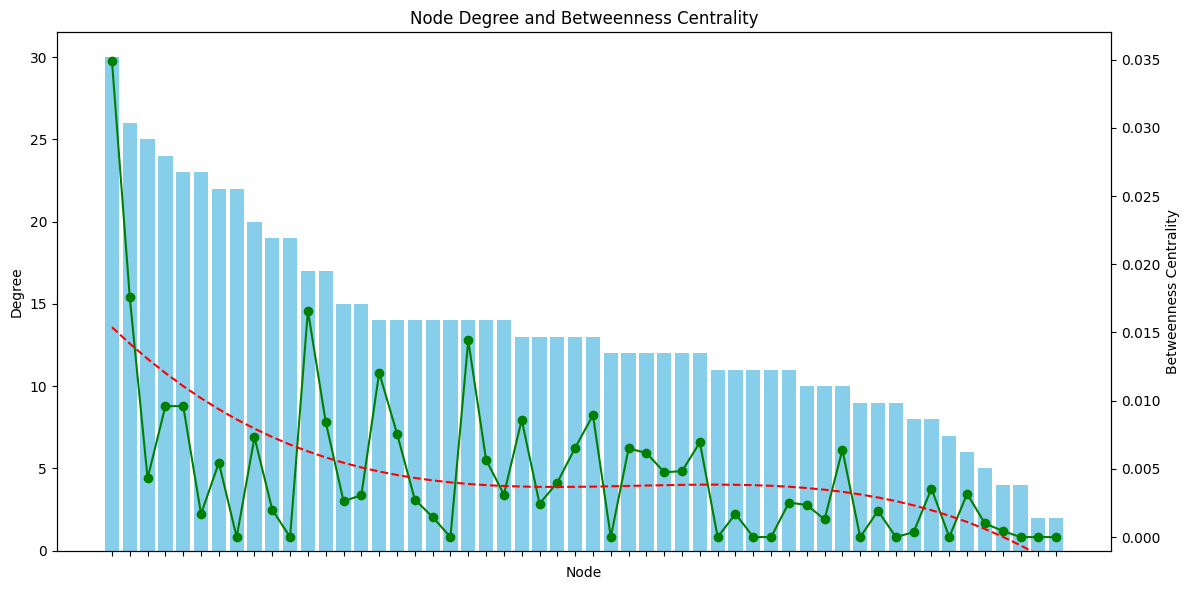

In [ ]:
# 计算度（总度）和介数中心性
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
in_degree_dict = dict(G.in_degree())
out_degree_dict = dict(G.out_degree())

# 构建DataFrame并按度排序
df = pd.DataFrame({
    'Node': list(degree_dict.keys()), # 节点名称
    'Degree': list(degree_dict.values()),  # 总度
    'In_Degree': list(in_degree_dict.values()),  # 入度
    'Out_Degree': list(out_degree_dict.values()), # 出度
    'Betweenness': [betweenness_dict[node] for node in degree_dict.keys()]
})
df_sorted = df.sort_values(by='Degree', ascending=False)

# 绘图
fig, ax1 = plt.subplots(figsize=(12, 6))
# --- 新增：为多项式拟合准备数据 ---
# 我们需要一个数字序列作为x轴来进行拟合，而不是节点名称
x_values = np.arange(len(df_sorted))
y_values = df_sorted['Betweenness'].values
# 设置您希望的多项式拟合阶数（例如，3阶）
poly_degree = 3
# 计算多项式拟合系数
coeffs = np.polyfit(x_values, y_values, poly_degree)
# 创建一个多项式函数
p = np.poly1d(coeffs)
# 计算拟合后的y值
y_fit = p(x_values)

# 柱状图：度
bars = ax1.bar(df_sorted['Node'].astype(str), df_sorted['Degree'], color='skyblue', label='Degree')
ax1.set_ylabel('Degree', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Node')
ax1.set_xticklabels([])
# ax1.set_xticklabels(df_sorted['Node'].astype(str), rotation=45)

# 折线图：介数中心性
ax2 = ax1.twinx()
ax2.set_ylim(-0.001, 0.037)
ax2.plot(df_sorted['Node'].astype(str), df_sorted['Betweenness'], color='green', marker='o', label='Betweenness')
ax2.set_ylabel('Betweenness Centrality', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax2.plot(x_values, y_fit, color='red', linestyle='--', label=f'Polynomial Fit (degree={poly_degree})')

plt.title('Node Degree and Betweenness Centrality')
plt.tight_layout()
plt.show()

In [ ]:
degrees = list(degree_dict.values())
average_degree = sum(degrees) / G.number_of_nodes()
print(average_degree)
df_sorted_2 = df.sort_values(by='Betweenness', ascending=False)
print(df_sorted_2)

13.407407407407407
                  Node  Degree  In_Degree  Out_Degree  Betweenness
9   Stockholm Odenplan      30         16          14     0.034897
18           Krigslida      26          9          17     0.017588
29           Årstaberg      17          7          10     0.016606
40    Stockholms södra      14          5           9     0.014421
21              Handen      14          2          12     0.012048
31           Norrviken      23         15           8     0.009604
26      Upplands Väsby      24         20           4     0.009594
24      Stockholm City      13          7           6     0.008934
39              Spånga      13          9           4     0.008598
10           Ulriksdal      17         12           5     0.008431
16             Stuvsta      14          8           6     0.007587
36               Solna      20         13           7     0.007310
34           Trångsund      12          4           8     0.006946
28              Älvsjö      13          4  

## 所有的参数

**out、in**   ----未完成：计算各种中心性

**betweenness**

closeness

pagerank

strongly_connected_components

strict_closeness

Eigenvector

**hubs**

Authorities

**Reachability**

**Cascade Potential**

Katz

综合得分

**出入度比 (Out/In)**

In [ ]:
# 计算出度、入度、介数中心性
out_degrees = dict(G.out_degree())
in_degrees = dict(G.in_degree())
betweenness = nx.betweenness_centrality(G)  # 默认对所有边视为单一关系处理

# 合并成 DataFrame
df_metrics = pd.DataFrame({
    "Node": list(G.nodes()),
    "Out-degree": [out_degrees[node] for node in G.nodes()],
    "In-degree": [in_degrees[node] for node in G.nodes()],
    "Betweenness Centrality": [betweenness[node] for node in G.nodes()]
})

# 设置 Node 为索引（可选）
df_metrics.set_index("Node", inplace=True)

# 导出到 Excel 文件
output_path = "causal_network_metrics.xlsx"
df_metrics.to_excel(output_path)

print("节点指标已保存至 Excel 文件：", output_path)

节点指标已保存至 Excel 文件： causal_network_metrics.xlsx


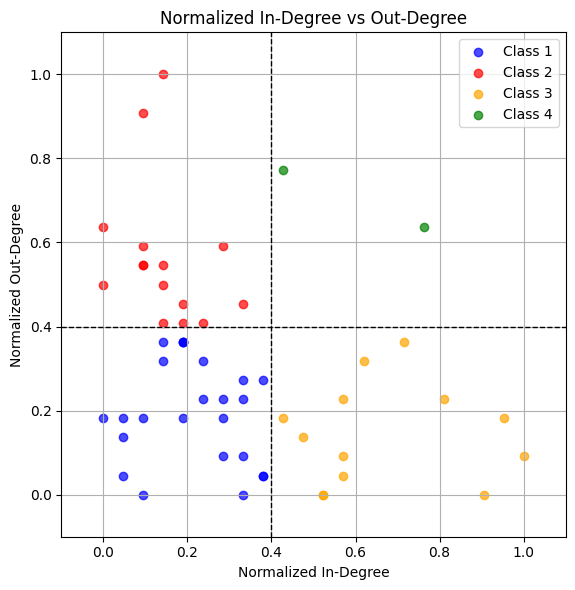

class_1= ['Knivsta', 'Barkarby', 'Farsta strand', 'Helenelund', 'Huddinge', 'Häggvik', 'Sollentuna', 'Stuvsta', 'Gröndalsviken', 'Märsta', 'Stockholm City', 'Sundbyberg', 'Vega', 'Hemfosa', 'Rotebro', 'Skogås', 'Trångsund', 'Västerhaninge', 'Järna', 'Mölnbo', 'Gnesta', 'Södertälje centrum', 'Tumba', 'Tullinge']
class_2= ['Flemingsberg', 'Nynäsgård', 'Ösmo', 'Handen', 'Älvsjö', 'Årstaberg', 'Jordbro', 'Stockholms södra', 'Segersäng', 'Tungelsta', 'Nynäshamn', 'Rönninge', 'Södertälje hamn', 'Södertälje syd', 'Östertälje']
class_3= ['Arlanda central', 'Uppsala C', 'Bro', 'Kallhäll', 'Kungsängen', 'Bålsta', 'Ulriksdal', 'Rosersberg', 'Upplands Väsby', 'Norrviken', 'Solna', 'Jakobsberg', 'Spånga']
class_4= ['Stockholm Odenplan', 'Krigslida']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 假设已有图G
nodes = list(G.nodes())

# 获取入度和出度
in_degrees = np.array(list(dict(G.in_degree()).values())).reshape(-1, 1)
out_degrees = np.array(list(dict(G.out_degree()).values())).reshape(-1, 1)


# 获取加权入度和出度
# in_degrees = np.array([d for _, d in G.in_degree(weight='weight')]).reshape(-1, 1)
# out_degrees = np.array([d for _, d in G.out_degree(weight='weight')]).reshape(-1, 1)

# 标准化到 [0, 1]
scaler = MinMaxScaler()
in_degrees_scaled = scaler.fit_transform(in_degrees).flatten()
out_degrees_scaled = scaler.fit_transform(out_degrees).flatten()

# in_median = np.median(in_degrees_scaled)
# out_median = np.median(out_degrees_scaled)

in_median = 0.4
out_median = 0.4

# in_median = np.mean(in_degrees_scaled)
# out_median = np.mean(out_degrees_scaled)

# 根据0.5划分四个区域的掩码
mask_ll = (in_degrees_scaled <= in_median) & (out_degrees_scaled <= out_median)  # 左下
mask_lu = (in_degrees_scaled <= in_median) & (out_degrees_scaled > out_median)   # 左上
mask_rl = (in_degrees_scaled > in_median) & (out_degrees_scaled <= out_median)   # 右下
mask_ru = (in_degrees_scaled > in_median) & (out_degrees_scaled > out_median)    # 右上

# 绘图
plt.figure(figsize=(6, 6))
plt.scatter(in_degrees_scaled[mask_ll], out_degrees_scaled[mask_ll], color='blue', alpha=0.7, label='Class 1')
plt.scatter(in_degrees_scaled[mask_lu], out_degrees_scaled[mask_lu], color='red', alpha=0.7, label='Class 2')
plt.scatter(in_degrees_scaled[mask_rl], out_degrees_scaled[mask_rl], color='orange', alpha=0.7, label='Class 3')
plt.scatter(in_degrees_scaled[mask_ru], out_degrees_scaled[mask_ru], color='green', alpha=0.7, label='Class 4')

# # 在小于0.5的区域手动画x=0.5和y=0.5的辅助线
# plt.plot([0.5, 0.5], [-0.2, 0.5], color='black', linestyle='--', linewidth=1)  # 垂直线左侧
# plt.plot([-0.2, 0.5], [0.5, 0.5], color='black', linestyle='--', linewidth=1)  # 水平线下侧
# # 在右上区域添加 y=x 斜线
# x_vals = np.linspace(0.5, 1.2, 200)
# plt.plot(x_vals, x_vals, color='black', linestyle='--')

plt.axvline(x=in_median, color='black', linestyle='--', linewidth=1)   # 垂直线（x = in_median）
plt.axhline(y=out_median, color='black', linestyle='--', linewidth=1)  # 水平线（y = out_median）

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Normalized In-Degree')
plt.ylabel('Normalized Out-Degree')
plt.title('Normalized In-Degree vs Out-Degree')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

def print_nodes_list(region_name, mask):
    idxs = np.where(mask)[0]
    stations = [nodes[i] for i in idxs]
    print(region_name,stations)

# 输出每个区域节点名称
print_nodes_list("class_1=", mask_ll)
print_nodes_list("class_2=", mask_lu)
print_nodes_list("class_3=", mask_rl)
print_nodes_list("class_4=", mask_ru)

In [ ]:
# 将 MultiDiGraph 转为普通 DiGraph（忽略多重边，只保留一条）
G_simple = nx.DiGraph()
for u, v in G.edges():
    G_simple.add_edge(u, v)

# 如果你希望转为无向图计算某些指标（如聚类系数），使用：
G_undirected = G_simple.to_undirected()

# 1. 直径（只适用于连通图）
if False:
    diameter = nx.diameter(G_simple)
else:
    # 获取最大强连通子图的直径
    largest_scc = max(nx.strongly_connected_components(G_simple), key=len)
    subgraph = G_simple.subgraph(largest_scc)
    diameter = nx.diameter(subgraph)

# 2. 连接密度
density = nx.density(G_simple)

# 3. 平均聚类系数（必须使用无向图）
avg_clustering = nx.average_clustering(G_undirected)

# 打印结果
print("网络直径（最大强连通子图）:", diameter)
print("连接密度:", round(density, 4))
print("平均聚类系数:", round(avg_clustering, 4))

# 存储路径长度的列表
path_lengths = []

# 记录每一对节点的距离
pairs = []

# 遍历所有节点对，收集存在路径的最短距离
for source in G_simple.nodes():
    lengths = nx.single_source_shortest_path_length(G_simple, source)
    for target, dist in lengths.items():
        if source != target:
            path_lengths.append(dist)
            pairs.append((source, target, dist))

# 计算指标
if path_lengths:
    avg_length = sum(path_lengths) / len(path_lengths)
    max_length = max(path_lengths)
    reachable_pairs = len(path_lengths)
    print("存在路径的节点对数：", reachable_pairs)
    print("平均最短路径长度：", round(avg_length, 4))
    print("最大最短路径长度（有效直径）：", max_length)
else:
    print("图中不存在任意节点对的可达路径。")

网络直径（最大强连通子图）: 0
连接密度: 0.1038
平均聚类系数: 0.3862
存在路径的节点对数： 838
平均最短路径长度： 1.8377
最大最短路径长度（有效直径）： 5


In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Ensure G is a MultiDiGraph as created previously
if not isinstance(G, nx.MultiDiGraph):
    print("Error: G is not a MultiDiGraph. Please run the previous cells to create G.")
else:
    # Create an undirected graph from G_simple (ignoring multiple edges, taking the max weight if needed)
    # If you want to use the original MultiDiGraph for a reason, you might need a different approach or library
    # As modularity is typically defined for simple graphs, we use G_simple's undirected version.
    G_simple = nx.DiGraph()
    for u, v, data in G.edges(data=True):
        if G_simple.has_edge(u, v):
            # If edge already exists, check if the current edge has a higher weight
            if data.get('weight', 1.0) > G_simple[u][v].get('weight', 1.0):
                 G_simple.add_edge(u, v, weight=data.get('weight', 1.0))
        else:
            G_simple.add_edge(u, v, weight=data.get('weight', 1.0))


    G_undirected = G_simple.to_undirected()

    # Calculate modularity
    try:
        # Use weight='weight' if edges have weights
        communities_undirected = list(greedy_modularity_communities(G_undirected, weight='weight'))
        modularity_undirected = nx.algorithms.community.modularity(G_undirected, communities_undirected, weight='weight')
        print(f"Modularity (Undirected Weighted): {modularity_undirected:.4f}")

    except Exception as e:
        print(f"Could not compute modularity: {e}")

Modularity (Undirected Weighted): 0.3540


In [ ]:
in_in_assort = nx.degree_assortativity_coefficient(G_simple, x='in', y='in')
out_out_assort = nx.degree_assortativity_coefficient(G_simple, x='out', y='out')
in_out_assort = nx.degree_assortativity_coefficient(G_simple, x='in', y='out')
out_in_assort = nx.degree_assortativity_coefficient(G_simple, x='out', y='in')

print(f"入度-入度同配性: {in_in_assort:.4f}")
print(f"出度-出度同配性: {out_out_assort:.4f}")
print(f"入度-出度同配性: {in_out_assort:.4f}")
print(f"出度-入度同配性: {out_in_assort:.4f}")

入度-入度同配性: 0.2786
出度-出度同配性: 0.2483
入度-出度同配性: -0.3047
出度-入度同配性: -0.1400


寻找val最大的因果边，看传播路径

threshold？

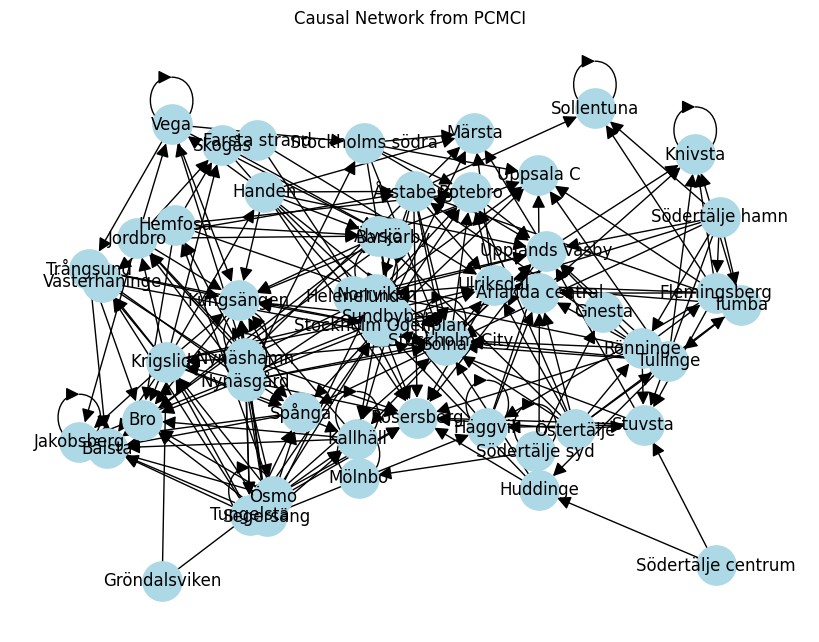

节点个数: 53
节点名称： ['Arlanda central', 'Knivsta', 'Uppsala C', 'Barkarby', 'Bro', 'Kallhäll', 'Kungsängen', 'Farsta strand', 'Stockholm Odenplan', 'Ulriksdal', 'Flemingsberg', 'Häggvik', 'Sollentuna', 'Stuvsta', 'Gröndalsviken', 'Krigslida', 'Ösmo', 'Handen', 'Märsta', 'Rosersberg', 'Stockholm City', 'Sundbyberg', 'Upplands Väsby', 'Vega', 'Älvsjö', 'Årstaberg', 'Helenelund', 'Hemfosa', 'Norrviken', 'Rotebro', 'Skogås', 'Västerhaninge', 'Huddinge', 'Solna', 'Jakobsberg', 'Jordbro', 'Spånga', 'Bålsta', 'Trångsund', 'Mölnbo', 'Nynäsgård', 'Segersäng', 'Stockholms södra', 'Tungelsta', 'Nynäshamn', 'Rönninge', 'Södertälje centrum', 'Södertälje hamn', 'Tumba', 'Södertälje syd', 'Gnesta', 'Tullinge', 'Östertälje']


In [ ]:
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']

Gmax = nx.DiGraph()

for i in range(num_vars):       # target
    v_max=0
    imax,jmax,taumax=0,0,0
    for j in range(num_vars):   # source
        for tau in range(1,tau_max_plus1):

            if p_matrix_clean[i, j, tau]<=alpha_level :
              Gmax.add_edge(variable_names[i], variable_names[j], lag=tau) #tau!=0的因果链
              if v_matrix[i, j, tau]>v_max:
                v_max=v_matrix[i, j, tau]
                imax=i
                jmax=j
                taumax=tau
    # if imax!=0 or jmax!=0 or taumax!=0:
    #   Gmax.add_edge(variable_names[imax], variable_names[jmax], lag=taumax)
    #生成val最强的传播路径，但是就是4-5-6-7-8---，看不出任何含义

plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(Gmax)

nx.draw(Gmax, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20)
plt.title("Causal Network from PCMCI")
plt.show()

num_nodes = Gmax.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称：", list(Gmax.nodes()))

1. Diameter（直径）
定义：网络中最短路径的最大值，即：从一个节点能到达的最远节点的“最短路径长度”。但仅限于强连通子图（strongly connected component）
2. Link Density（连接密度）
定义：网络中实际存在的边数 / 所有可能存在的边数。
有向图中最大边数是n(n−1)。站点之间存在因果关系的紧密程度。
3. Assortativity（同配性）
定义：度同配性系数。衡量连接的节点是否倾向于有相似度（比如高度节点连高度节点）。可以分析入度或出度的相关性.代表含义：高因果影响节点是否倾向于彼此连接。
4. Network Efficiency（网络效率）
定义：网络中所有成对节点的平均“信息传递效率”，即平均路径长度的倒数。代表延误因果传播是否“快速”。
5. Community Detection（社区结构）
定义：将网络划分成若干个“紧密连接”的子群体（社区）。在弱连通或传播性较强的图中有价值。一组站点在传播链中彼此关系紧密（可能是子线路或站点组）
6. Network Motifs（网络模体）
定义：网络中出现频率远高于随机网络的微结构子图（如三角形、链式三元组等）。
适用于你：是，非常适用于因果图，可以找出常见传播结构（如 A→B→C）。最常见的传播模式结构。

In [ ]:
# 获取最大强连通子图
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc)

diameter = nx.diameter(G_scc)
print(f"Diameter: {diameter}")

n = G.number_of_nodes()
m = G.number_of_edges()
density = m / (n * (n - 1))
print(f"Link Density: {density:.4f}")

assortativity = nx.degree_assortativity_coefficient(G, x='out', y='out')
print(f"Assortativity (out-degree): {assortativity:.4f}")

efficiency = nx.global_efficiency(G.to_undirected())  # 或 largest_scc.to_undirected()
print(f"Global Efficiency: {efficiency:.4f}")

from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G.to_undirected())
for i, c in enumerate(communities):
    print(f"Community {i}: {sorted(c)}")

triads = nx.triadic_census(G)  # 只适用于有向图且至少3个节点
print(triads)

Diameter: 0
Link Density: 0.1265
Assortativity (out-degree): 0.2708
Global Efficiency: 0.5061
Community 0: ['Barkarby', 'Bro', 'Bålsta', 'Gröndalsviken', 'Handen', 'Hemfosa', 'Jakobsberg', 'Jordbro', 'Kallhäll', 'Krigslida', 'Kungsängen', 'Nynäsgård', 'Nynäshamn', 'Segersäng', 'Skogås', 'Spånga', 'Stockholms södra', 'Sundbyberg', 'Trångsund', 'Tungelsta', 'Vega', 'Västerhaninge', 'Älvsjö', 'Ösmo']
Community 1: ['Arlanda central', 'Flemingsberg', 'Helenelund', 'Huddinge', 'Häggvik', 'Knivsta', 'Norrviken', 'Rosersberg', 'Rotebro', 'Rönninge', 'Sollentuna', 'Solna', 'Stockholm City', 'Stuvsta', 'Södertälje centrum', 'Södertälje hamn', 'Tullinge', 'Tumba', 'Ulriksdal', 'Upplands Väsby', 'Uppsala C', 'Årstaberg', 'Östertälje']
Community 2: ['Gnesta', 'Järna', 'Mölnbo', 'Södertälje syd']
Community 3: ['Farsta strand', 'Märsta', 'Stockholm Odenplan']
{'003': 12948, '012': 9347, '102': 0, '021D': 716, '021U': 691, '021C': 751, '111D': 0, '111U': 0, '030T': 351, '030C': 0, '201': 0, '120D': 0,

影响（out）受影响（in）的val值和排序

In [ ]:
import networkx as nx
from heapq import heappush, heappushpop, nlargest
from collections import Counter

def top_k_paths_of_length(G, path_length=3, k=5):
    top_paths = []

    def dfs(path, total_weight):
        if len(path) == path_length + 1:
            # 满足长度要求，尝试加入前k个最大路径中
            if len(top_paths) < k:
                heappush(top_paths, (total_weight, path.copy()))
            else:
                heappushpop(top_paths, (total_weight, path.copy()))
            return

        last_node = path[-1]
        for neighbor in G.successors(last_node):
            # 如果不允许重复节点，可启用以下检查
            # if neighbor in path:
            #     continue
            edge_data = G.get_edge_data(last_node, neighbor)
            if edge_data is None or 'weight' not in edge_data:
                continue
            dfs(path + [neighbor], total_weight + edge_data['weight'])

    for start_node in G.nodes():
        dfs([start_node], 0)

    return nlargest(k, top_paths)

# 获取 v-value 最高的 30 条路径（路径长度为 4）
top30 = top_k_paths_of_length(G, path_length=4, k=30)

# 统计所有路径中站点的出现频率
node_counts = Counter()
for weight, path in top30:
    node_counts.update(path)  # 统计路径中每个站点的出现次数

# 获取出现频率最高的 5 个站点
top5_nodes = node_counts.most_common(18)

# 输出结果
print("Top 5 most frequent nodes in the top 30 paths:")
for node, count in top5_nodes:
    print(f"Node: {node}, Frequency: {count}")

# 可选：输出 top 30 路径以便检查
print("\nTop 30 paths for reference:")
for weight, path in top30:
    print(f"Path: {path}, Total Weight: {weight}")

Top 5 most frequent nodes in the top 30 paths:

Top 30 paths for reference:


In [ ]:
import networkx as nx
from heapq import heappush, heappushpop, nlargest
from collections import Counter

def top_k_paths_of_length(G, path_length=3, k=5):
    top_paths = []

    def dfs(path, total_weight):
        if len(path) == path_length + 1:
            # 满足长度要求，尝试加入前k个最大路径中
            if len(top_paths) < k:
                heappush(top_paths, (total_weight, path.copy()))
            else:
                heappushpop(top_paths, (total_weight, path.copy()))
            return

        last_node = path[-1]
        for neighbor in G.successors(last_node):
            # 如果不允许重复节点，可启用以下检查
            # if neighbor in path:
            #     continue
            edge_data = G.get_edge_data(last_node, neighbor)
            if edge_data is None or 'weight' not in edge_data:
                continue
            dfs(path + [neighbor], total_weight + edge_data['weight'])

    for start_node in G.nodes():
        dfs([start_node], 0)

    return nlargest(k, top_paths)

# 获取 v-value 最高的 30 条路径（路径长度为 4）
top30 = top_k_paths_of_length(G, path_length=4, k=30)

# 统计所有路径中从第二站到第三站的子路径（边）的频率
subpath_counts = Counter()
for weight, path in top30:
    if len(path) >= 3:  # 确保路径有足够的节点
        subpath0 = (path[0], path[1])
        subpath1 = (path[1], path[2])  # 提取第二站到第三站的边
        subpath2 = (path[2], path[3])
        subpath_counts[subpath0] += 1
        subpath_counts[subpath1] += 1
        subpath_counts[subpath2] += 1

# 获取频率最高的 5 个子路径
top5_subpaths = subpath_counts.most_common(10)

# 输出结果
print("Top 5 most frequent subpaths (from 2nd to 3rd node) in the top 30 paths:")
for (node1, node2), count in top5_subpaths:
    print(f"Edge: {node1} -> {node2}, Frequency: {count}")

# 可选：输出 top 30 路径以便检查
print("\nTop 30 paths for reference:")
for weight, path in top30:
    print(f"Path: {path}, Total Weight: {weight}")

Top 5 most frequent subpaths (from 2nd to 3rd node) in the top 30 paths:

Top 30 paths for reference:


In [ ]:
# 遍历所有 target, source, tau 组合
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']
ki=[0]*num_vars
kj=[0]*num_vars

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            if p_matrix_clean[i, j, tau]<=alpha_level:
              ki[i]+=v_matrix[i, j, tau]  # k[i]为影响别人 k[j]为受影响
              kj[j]+=v_matrix[i, j, tau]

k = [x + y for x, y in zip(ki, kj)]
# 整合为 DataFrame
df_k = pd.DataFrame({
    'station': df_delay.columns,
    'influence_received': ki
})

# 按影响值降序排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 输出结果
print(df_k_sorted)

               station  influence_received
0            Nynäsgård           15.380899
1            Nynäshamn           13.420047
2            Krigslida           11.381380
3   Stockholm Odenplan            9.487618
4      Södertälje hamn            9.399037
5                 Ösmo            8.912636
6            Tungelsta            8.541209
7            Segersäng            8.011544
8             Rönninge            7.941007
9               Handen            7.820446
10          Östertälje            7.364996
11             Jordbro            7.198348
12           Årstaberg            6.898095
13        Flemingsberg            6.857972
14      Södertälje syd            6.741666
15              Älvsjö            6.022477
16    Stockholms södra            5.911398
17            Tullinge            5.413637
18           Trångsund            5.289420
19             Hemfosa            5.166938
20           Norrviken            5.128615
21               Tumba            4.945087
22         

In [ ]:
# 遍历所有 target, source, tau 组合
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']
ki=[0]*num_vars
kj=[0]*num_vars

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            if p_matrix_clean[i, j, tau]<=alpha_level:
              ki[i]+=v_matrix[i, j, tau]  # k[i]为影响别人 k[j]为受影响
              kj[j]+=v_matrix[i, j, tau]

p=[0.1456, 0.10075566750629723, 0.09252217997465145, 0.0892049127343245, 0.0800405268490375, 0.12674379040489964,
   0.10751748251748251, 0.10307692307692308, 0.07809330628803246, 0.11924654412881665, 0.12506433350488935, 0.12030586236193713,
   0.11468381564844587, 0.09737899368662713, 0.07202584568605093, 0.06722689075630252, 0.0986050066883241, 0.10600817867253853,
   0.09965635738831616, 0.09795756494150307, 0.1428083361803895, 0.08733624454148471, 0.1254793680012272, 0.10553278688524591,
   0.09897435897435898, 0.10853242320819112, 0.11155439619456806, 0.12094448449891852, 0.12422680412371134, 0.09366704588547592,
   0.11724452554744526, 0.13363431151241534, 0.10283315844700944, 0.10934199837530463, 0.1257867543447628, 0.11052501442347318,
   0.12568027210884353, 0.10975865687303253, 0.0892722045695264, 0.14257694628847314, 0.0711892797319933, 0.08623957543593631,
   0.12619535519125682, 0.12495732331853875, 0.11391177896267571, 0.12012644889357219, 0.1139966782424883, 0.11128575919522163,
   0.07547885454200645, 0.0804333552199606, 0.10366800098031206, 0.10605310902193633, 0.1293634496919918, 0.11962414166967836
   ]

k = [z*(x + y) for x, y, z in zip(ki, kj, p)]
# 整合为 DataFrame
df_k = pd.DataFrame({
    'station': df_delay.columns,
    'influence_received': k
})

# 按影响值降序排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 输出结果
print(df_k_sorted)

               station  influence_received
0   Stockholm Odenplan            2.531842
1            Norrviken            1.886460
2            Nynäsgård            1.853634
3       Upplands Väsby            1.847910
4            Krigslida            1.753432
5                Solna            1.745716
6           Kungsängen            1.528231
7            Nynäshamn            1.461939
8            Tungelsta            1.444048
9            Ulriksdal            1.439513
10            Kallhäll            1.418953
11          Rosersberg            1.370214
12     Södertälje hamn            1.340086
13                Ösmo            1.325872
14     Arlanda central            1.242411
15           Årstaberg            1.212609
16            Rönninge            1.195248
17        Flemingsberg            1.184678
18           Segersäng            1.172339
19             Stuvsta            1.138656
20    Stockholms södra            1.033106
21             Hemfosa            0.989470
22      Sto

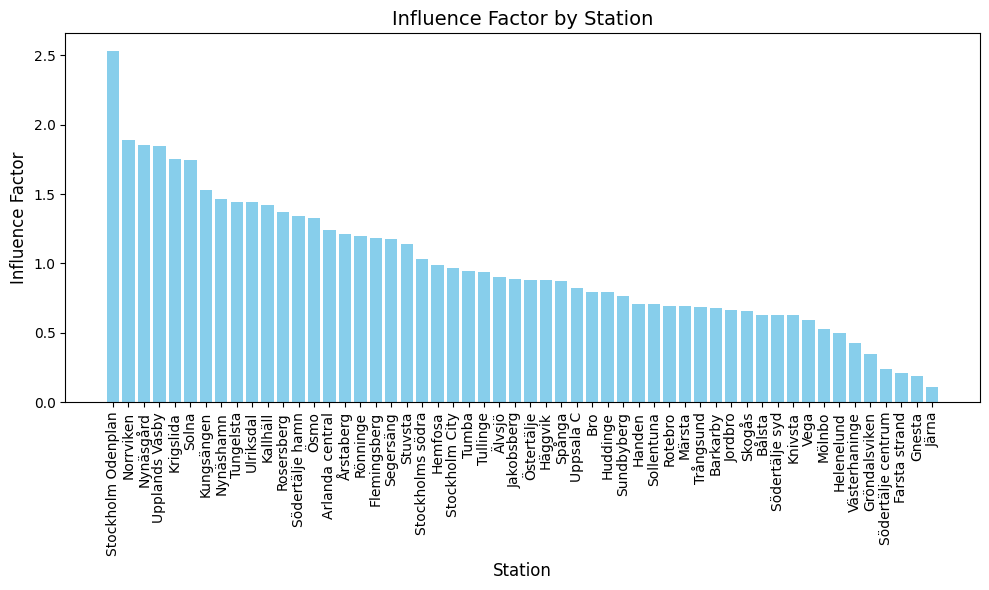

In [ ]:
# 按影响度排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 去掉站点名称前面的数字和下划线
df_k_sorted['station'] = df_k_sorted['station'].str.replace(r'^\d+_', '', regex=True)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(df_k_sorted['station'], df_k_sorted['influence_received'], color='skyblue')

# 添加标题和标签
plt.title('Influence Factor by Station', fontsize=14)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Influence Factor', fontsize=12)

# plt.gca().axes.get_xaxis().set_visible(False)

# 旋转x轴标签，使其更易读
plt.xticks(rotation=90)

# 显示图表
plt.tight_layout()
plt.show()

还有什么能够参考到weight的复杂网络指标？？


Triad Significance Profile (TSP):
003: -0.332
012: 0.409
102: -0.239
021D: -0.155
021U: -0.179
021C: 0.149
111D: -0.230
111U: -0.227
030T: 0.593
030C: -0.221
201: -0.082
120D: -0.129
120U: -0.185
120C: -0.145
210: -0.053
300: -0.016


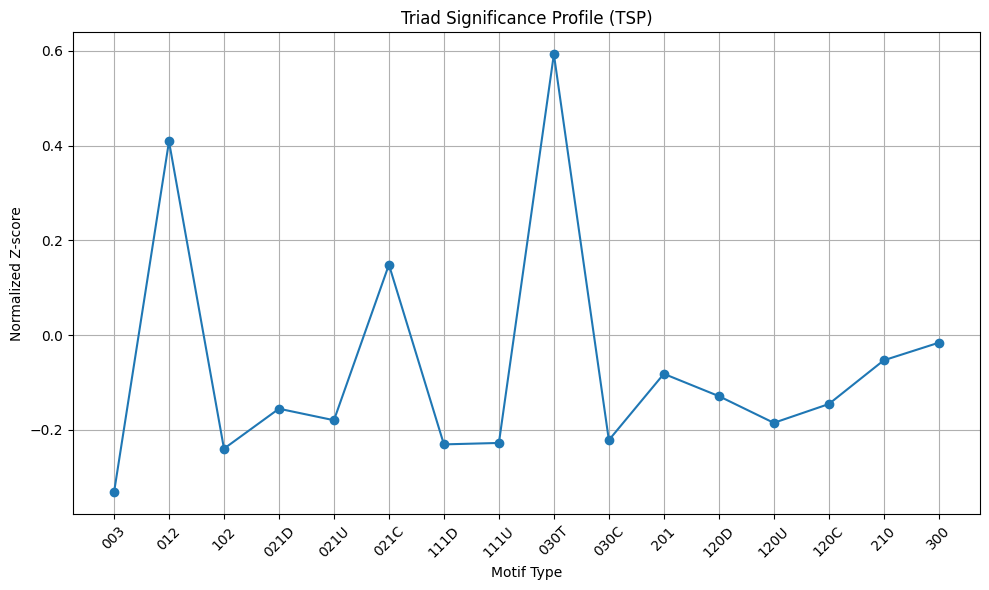

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import copy
# --------------------
# Step 2: 计算真实网络 motif 出现次数
# --------------------
real_counts = nx.triadic_census(G)
motif_names = list(real_counts.keys())
real_vector = np.array([real_counts[m] for m in motif_names])

# --------------------
# Step 3: 构造随机网络并计算 motif 出现次数
# --------------------
n_random = 100
random_counts_list = []

for i in range(n_random):
    # 深拷贝网络
    G_random = copy.deepcopy(G_simple)
    # 执行重连：degree-preserving randomization
    nx.directed_edge_swap(G_random, nswap=2 * G.number_of_edges(), max_tries=100000)
    # motif 统计
    counts = nx.triadic_census(G_random)
    vector = np.array([counts[m] for m in motif_names])
    random_counts_list.append(vector)

# --------------------
# Step 4: 计算均值、标准差和 Z-score
# --------------------
random_matrix = np.array(random_counts_list)
mean_vector = np.mean(random_matrix, axis=0)
std_vector = np.std(random_matrix, axis=0, ddof=1)  # 使用样本标准差
z_scores = np.where(std_vector > 0, (real_vector - mean_vector) / std_vector, 0)

# --------------------
# Step 5: 归一化 Z-score 得到 TSP
# --------------------
z_norm = z_scores / np.sqrt(np.sum(z_scores ** 2))

# --------------------
# Step 6: 输出并画图
# --------------------
print("Triad Significance Profile (TSP):")
for m, v in zip(motif_names, z_norm):
    print(f"{m}: {v:.3f}")

# 画图
plt.figure(figsize=(10, 6))
plt.plot(motif_names, z_norm, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Motif Type")
plt.ylabel("Normalized Z-score")
plt.title("Triad Significance Profile (TSP)")
plt.grid(True)
plt.tight_layout()
plt.show()

三元组图已保存到 triad_graphs_fixed_triangle.png


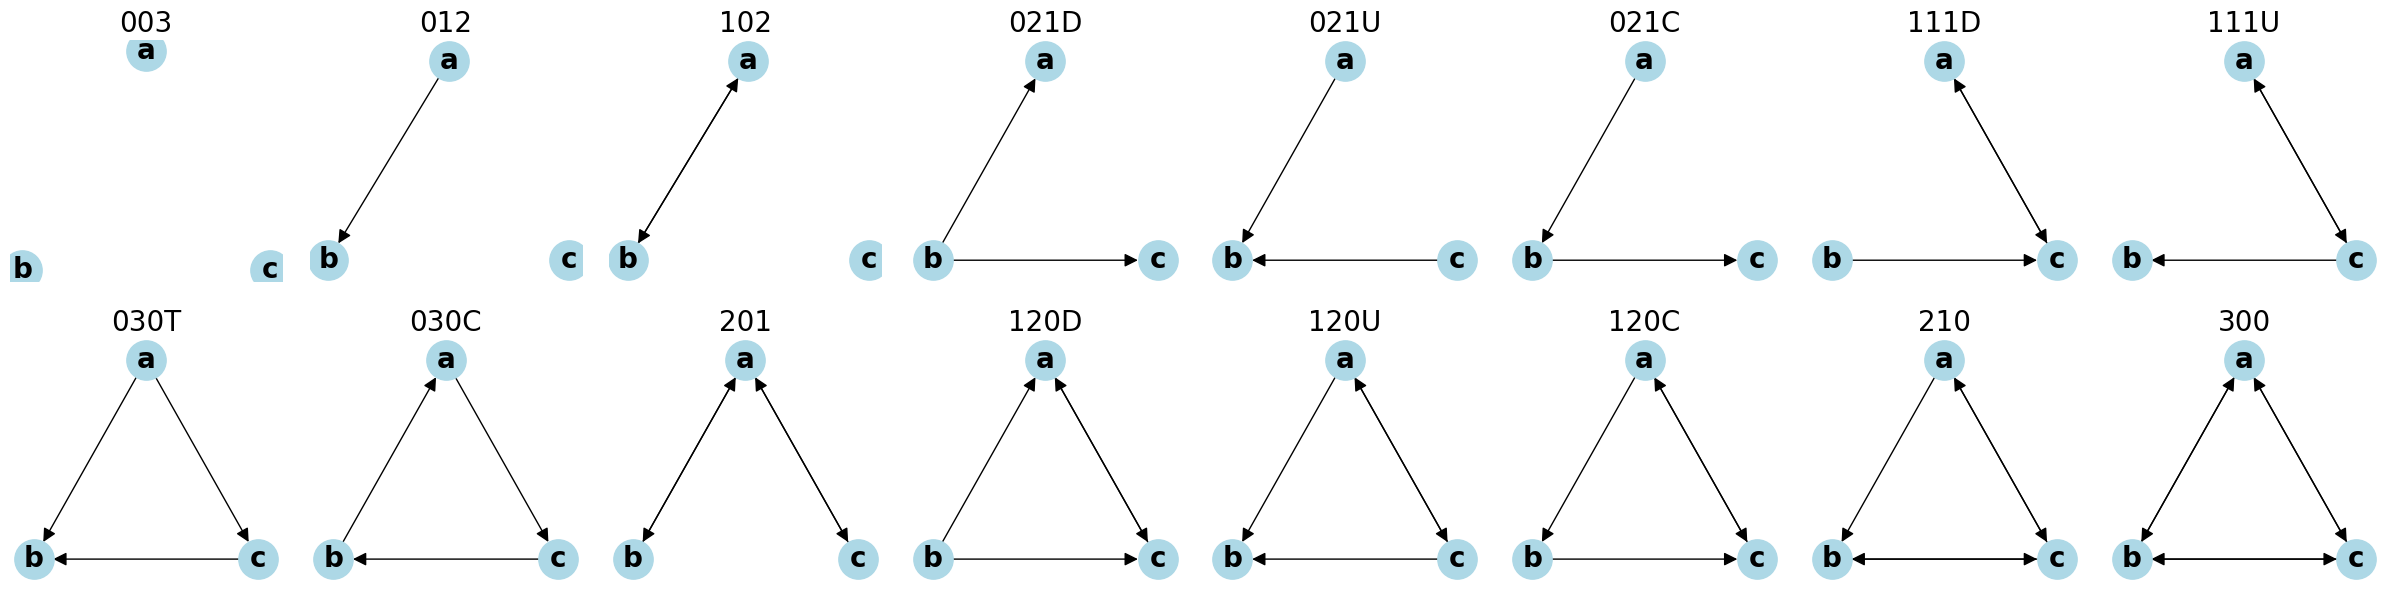

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 所有三元组类型
triad_types = ['003', '012', '102', '021D', '021U', '021C', '111D', '111U',
               '030T', '030C', '201', '120D', '120U', '120C', '210', '300']

# 定义等边三角形布局
scale = 0.5  # 缩放因子，边长从 1 变为 0.6
triangle_pos = {
    'a': (0, 1),                    # 顶点 A (顶部)
    'b': (-np.sqrt(3)/2, -0.5),     # 顶点 B (右下)
    'c': (np.sqrt(3)/2, -0.5)     # 顶点 C (左下)
}

# 创建 4x4 网格布局
fig, axes = plt.subplots(2, 8, figsize=(24, 6))
axes = axes.flatten()  # 展平为 1D 数组便于索引

# 为每种三元组生成图并绘制
for i, triad_name in enumerate(triad_types):
    # 生成三元组图
    G_triad = nx.triad_graph(triad_name)

    # 绘制
    nx.draw(G_triad, triangle_pos, ax=axes[i], with_labels=True, node_size=800,
            node_color='lightblue', arrowsize=20, font_size=20, font_weight='bold')
    axes[i].set_title(f"{triad_name}", fontsize=20)

# 调整布局
plt.tight_layout(h_pad=2, w_pad=2)

# 保存为 PNG
plt.savefig("triad_graphs_fixed_triangle.png", dpi=300, bbox_inches='tight')
print("三元组图已保存到 triad_graphs_fixed_triangle.png")

# 显示
plt.show()